# 学習済みCNNモデルを用いた画像分類
- TensorFlowを用いて、学習済みモデルを読み込んで使ってみよう

    - 使用する学習済みモデル：EfficientNet    
        - https://arxiv.org/pdf/1905.11946.pdf  

    - 学習済みモデルの利用方法 
        - https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

    - 学習時に用いたImageNetのラベル（1000クラス）の内容  
        - https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a


## 1. ライブラリの読み込み

In [1]:
import numpy as np
from PIL import Image

# データをテンソルとして読み込む
from tensorflow.io import read_file
# 画像のテンソルを加工
from tensorflow.image import decode_png, resize
# テンソルの軸を増やす
from tensorflow import expand_dims

# EfficientNetの学習済みモデル
from tensorflow.keras.applications import EfficientNetB0
# 予測結果を読み取りやすい形式に変換
from tensorflow.keras.applications.imagenet_utils import decode_predictions

## 2. データの読み込み

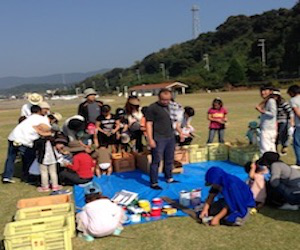

In [2]:
# 画像のパスを設定
file_path = "../../1_data/ch12/park.jpg"

# 画像の確認
img = Image.open(file_path)
img

## 3. データの前処理

In [3]:
# 学習時の画像サイズ
IMAGE_SIZE = 224

def get_image(filename):
    # TensorFlow用の形式で読み込む
    img = read_file(filename)
    img = decode_png(img, channels=3)
    # 224×224にリサイズ
    img = resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    # データの軸を増やす
    img = expand_dims(img, axis=0)
    return img


## 4. モデルの読み込み

In [4]:
# EfficientNetB0のうち、ImageNetを学習させたものを読み込む
model = EfficientNetB0(weights="imagenet")

## 5. 予測の実行

In [5]:
# データの読み込み・前処理
image = get_image(file_path)
print("input shape: ", image.shape)

# 1000クラス分の確率値を計算
result = model.predict(image)

# トップ10のクラス名とその確率を出力
decode_predictions(result, top=10)[0]

input shape:  (1, 224, 224, 3)
1/1 [==============================] - 2s 2s/step


[('n09332890', 'lakeside', 0.0895904),
 ('n02782093', 'balloon', 0.08481371),
 ('n09428293', 'seashore', 0.06655197),
 ('n03888257', 'parachute', 0.04206922),
 ('n03355925', 'flagpole', 0.036196813),
 ('n03792972', 'mountain_tent', 0.030743118),
 ('n03376595', 'folding_chair', 0.030592278),
 ('n03733281', 'maze', 0.020027254),
 ('n09421951', 'sandbar', 0.017280469),
 ('n03127925', 'crate', 0.015329881)]

### [問]
* 上記の画像にて、人が認識されないのはなぜだろうか？

### [演習]　
- 自分が持っている写真をいくつか読みこんで、識別させてみよう　　
- 識別されやすい物体と識別されにくい物体を確認してみよう